Lab 01

Tăng Mỹ Hân

22520395

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/DS102/BTTH Buổi 1

/content/drive/MyDrive/Colab Notebooks/DS102/BTTH Buổi 1


# Bài 1

## Data pre-processing

In [4]:
df = pd.read_csv('./forest+fires/forestfires.csv')

In [5]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None


In [7]:
def convert_month(month: str) -> int:
  month_dict = {
      'jan': 1,
      'feb': 2,
      'mar': 3,
      'apr': 4,
      'may': 5,
      'jun': 6,
      'jul': 7,
      'aug': 8,
      'sep': 9,
      'oct': 10,
      'nov': 11,
      'dec': 12
  }
  return month_dict[month]

df['month'] = df['month'].apply(convert_month)

In [8]:
def convert_day(day: str) -> int:
  day_dict = {
      'mon': 0,
      'tue': 1,
      'wed': 2,
      'thu': 3,
      'fri': 4,
      'sat': 5,
      'sun': 6
  }
  return day_dict[day]

df['day'] = df['day'].apply(convert_day)

In [9]:
class LinearRegression:
  def fit(self, X: np.ndarray, y: np.ndarray) -> None:
    cov = np.matmul(X.T, X)
    inv_cov = np.linalg.inv(cov)
    self.theta_: np.ndarray = inv_cov @ (X.T @ y)

  def rmse(self, y: np.ndarray, y_hat: np.ndarray) -> float:
    delta = y - y_hat
    return np.square(delta).mean() ** 0.5

  def predict(self, X: np.ndarray) -> np.ndarray:
    y_pred = np.matmul(self.theta_.T, X.T)
    return y_pred

In [10]:
lr = LinearRegression()

## Defining the input and output vectors

In [11]:
X_y = df.to_numpy()

In [12]:
X_y.shape

(517, 13)

In [13]:
N = df.shape[0]
X_y_train, X_y_test = np.split(X_y, indices_or_sections=[int(0.8*N)])

In [14]:
X_train, X_test = X_y_train[:, :-1], X_y_test[:, :-1]
X_train.shape, X_test.shape

((413, 12), (104, 12))

In [15]:
y_train, y_test = X_y_train[:, -1], X_y_test[:, -1]
y_train.shape, y_test.shape

((413,), (104,))

## Fit model

In [16]:
lr.fit(X_train, y_train)

In [17]:
lr.theta_

array([  1.10050614,  -0.45029193,   2.91365808,   1.83374128,
        -0.0394413 ,   0.11030452,  -0.02604095,  -0.92652922,
         0.31788735,  -0.24756586,   0.02313453, -12.01475469])

In [18]:
lr.theta_.shape

(12,)

In [19]:
y_pred = lr.predict(X_test)

In [20]:
rmse = lr.rmse(y_pred, y_test)
print('RMSE =',rmse)

RMSE = 79.98777585416205


# Bài 2:
Chuẩn hoá dữ liệu về phân phối có kỳ vọng là 0 và phương sai là 1.
So sánh kết quả của mô hình sau khi được huấn luyện với dữ liệu đã được chuẩn hoá
so với kết quả trong bài 1.

In [21]:
df2 = df.copy()

In [22]:
for column in df.columns:
    if df2[column].dtype == 'float64' and column != 'area':
        mean = df2[column].mean()
        std = df2[column].std()
        df2[column] = (df2[column] - mean) / std

In [23]:
df2.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,4,-0.805180,-1.322045,-1.828706,-0.860113,-1.840857,51,1.497164,-0.073197,0.0
1,7,4,10,1,-0.008094,-1.178399,0.488418,-0.509195,-0.153130,33,-1.740070,-0.073197,0.0
2,7,4,10,5,-0.008094,-1.048806,0.560173,-0.509195,-0.738668,33,-1.516813,-0.073197,0.0
3,8,6,3,4,0.191177,-1.211188,-1.896429,-0.004751,-1.823636,97,-0.009824,0.602572,0.0
4,8,6,3,6,-0.243597,-0.930142,-1.796859,0.126843,-1.289763,99,-1.237741,-0.073197,0.0


In [24]:
X_y = df2.to_numpy()
N = df2.shape[0]
X_y_train , X_y_test = np.split (X_y, indices_or_sections=[int (0.8 * N)])

X_train, X_test = X_y_train[:, :-1], X_y_test[:, :-1]
y_train, y_test = X_y_train[:, -1], X_y_test[:, -1]

In [25]:
lr_scaled = LinearRegression()
lr_scaled.fit(X_train, y_train)
y_pred_scaled = lr_scaled.predict(X_test)
rmse_scaled = lr_scaled.rmse(y_test, y_pred_scaled)

In [26]:
print('RMSE khi chưa chuẩn hóa: ',rmse)
print("RMSE khi đã chuẩn hóa:", rmse_scaled)

RMSE khi chưa chuẩn hóa:  79.98777585416205
RMSE khi đã chuẩn hóa: 79.92538705919264


# Bài 3:
Tiến hành kỹ thuật Feature Engineering, tìm ra các thuộc tính có tính
chất colinearity (linearly dependent). Huấn luyện lại phương pháp hồi quy tuyến tính
với bộ dữ liệu chỉ giữ lại các thuộc tính uncorrelated

In [27]:
df_corr = df.copy()

In [28]:
df_corr.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,4,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,5,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


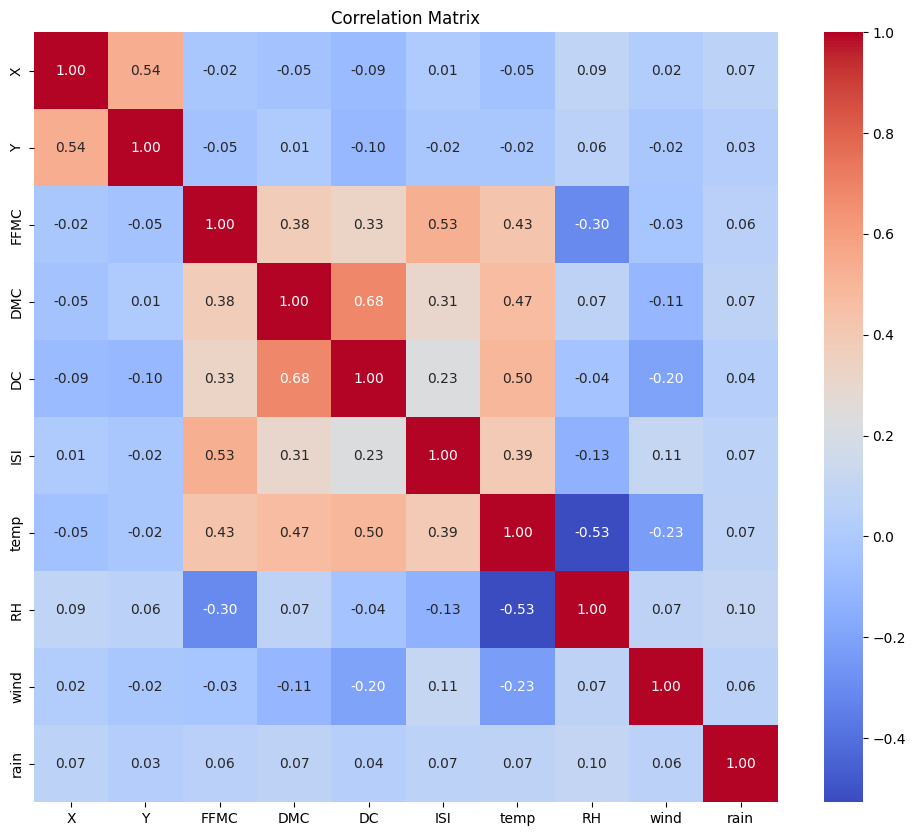

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df_corr.drop(['area', 'month', 'day'], axis=1).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Ta thấy cặp thuộc tính DMC và DC có độ tương quan cao nhất trong các cặp (0.68), nên ta sẽ loại bỏ một trong 2 thuộc tính này.

In [30]:
df_corr.drop(columns=['DMC'], inplace=True)

In [31]:
X_y = df_corr.to_numpy()
N = df_corr.shape[0]
X_y_train , X_y_test = np.split (X_y, indices_or_sections=[int (0.8 * N)])

X_train, X_test = X_y_train[:, :-1], X_y_test[:, :-1]
y_train, y_test = X_y_train[:, -1], X_y_test[:, -1]

In [32]:
lr_drop = LinearRegression()
lr_drop.fit(X_train, y_train)
y_pred_drop = lr_drop.predict(X_test)
rmse_drop= lr_drop.rmse(y_test, y_pred_drop)

In [33]:
print("RMSE khi chưa chuẩn hóa:\t", rmse)
print("RMSE khi đã chuẩn hóa:\t\t", rmse_scaled)
print("RMSE khi bỏ thuộc tính DMC:\t", rmse_drop)


RMSE khi chưa chuẩn hóa:	 79.98777585416205
RMSE khi đã chuẩn hóa:		 79.92538705919264
RMSE khi bỏ thuộc tính DMC:	 80.0771012715967


Kết luận: Loại bỏ thuộc tính DMC trong trường hợp này không mang lại hiệu quả.

# Bài 4:
Sử dụng thư viện Machine Learning (Sklearn hoặc Skorch) thực thi lại
phương pháp Linear Regression.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [35]:
df_sk = df.copy()

In [36]:
X = df_sk.iloc[:, :-1].values
y = df_sk.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE using sklearn:", rmse)

RMSE using sklearn: 80.02441553024424
